In [1]:
# 통계 관련 패키지 불러오기
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
# 환경설정
import matplotlib
matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('axes',unicode_minus=False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/campus4D022/Downloads/final_data1.csv')
df

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,물품중분류,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,논지엠오유정란,식품,신선,토요일,30대,60,유정란/친환경_10알,9924,중,적음
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,멥쌀,기타,비식품,토요일,30대,60,칠분도미/유_2kg,23821,고,적음
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,양념육,식품,기타,토요일,30대,60,양념닭갈비_500g,23164,고,적음
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,멸치류,식품,기타,토요일,40대,100,볶음멸치/상_300g,16655,고,보통
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,도라지/손질,식품,신선/유기농,토요일,30대,60,채도라지_150g,8423,중,적음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663789,1523874368,정상회원,1.0,166554,2022-10-25,2022-10-26,2022-10-26,0,0,NaN,...,추출/농축액,식품,유기농,화요일,30대,2,흑염소진액_100ml,131886,고,적음
663790,402835520,정상회원,1.0,12635,2022-10-29,2022-10-29,2022-10-30,0,0,NaN,...,무항생제닭,식품,신선,토요일,40대,282,닭가슴살_200g,10869,중,많음
663791,402835520,정상회원,1.0,7849,2022-10-29,2022-10-29,2022-10-29,0,0,NaN,...,요구르트,식품,신선,토요일,40대,282,플레인요구르트_450ml,7849,중,많음
663792,1544381312,정상회원,1.0,7275,2022-11-02,2022-11-02,2022-11-03,6270,0,NaN,...,어묵,식품,기타,수요일,40대,30,명태참어묵_300g,7275,중,적음


In [4]:
df[['주문시간']]

,주문시간
0,13:00:00
1,13:00:00
2,13:00:00
3,13:00:00
4,13:00:00
...,...
663789,01:00:00
663790,01:00:00
663791,01:00:00
663792,01:00:00


In [5]:
sal = pd.read_csv('C:/Users/campus4D022/Desktop/data/sales_data.csv')
sal.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,오후 12:60,100022137V2_1606
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,오후 12:60,100021452V2_1113
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,오후 12:60,10002931V2_708
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559


In [6]:
df.isnull().sum()

회원번호               0
회원상태               0
구매수량               0
구매금액               0
주문일시               0
배송시작일          30458
배송완료일          30458
사용 적립금             0
사용 포인트 네이버         0
주문취소여부        633336
주문시간               0
제품번호               0
배송기간           30458
오전오후               0
성별               747
나이               747
등록카드             747
결혼               747
구독여부               0
주소지              747
세부주소지            747
물품대분류              0
물품중분류              0
식품/비식품             0
유기신선               0
주문요일               0
연령대                0
이용횟수               0
물품명_상품중량           0
물품평균금액             0
고중저                0
이용횟수_범주            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663794 non-null  bool   
 19  주소

In [8]:
pro = pd.read_csv('C:/Users/campus4D022/Desktop/data/product_data.csv')
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품번호    2549 non-null   object
 1   물품명     2549 non-null   object
 2   물품대분류   2549 non-null   object
 3   물품중분류   2549 non-null   object
 4   상품중량    2330 non-null   object
dtypes: object(5)
memory usage: 99.7+ KB


In [9]:
mem = pd.read_csv('C:/Users/campus4D022/Desktop/data/member_data.csv')
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    12540 non-null  int64 
 1   회원상태    12539 non-null  object
 2   성별      12539 non-null  object
 3   나이      12540 non-null  int64 
 4   등록카드    12525 non-null  object
 5   결혼      9823 non-null   object
 6   구독여부    10194 non-null  object
 7   주소지     12537 non-null  object
 8   세부주소지   12531 non-null  object
dtypes: int64(2), object(7)
memory usage: 881.8+ KB


### 변수들의 분포확인

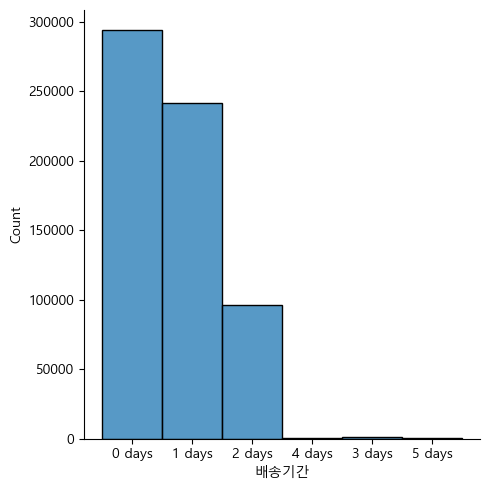

In [12]:
sns.displot(df,x='배송기간')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663794 non-null  bool   
 19  주소

## 연관분석

In [15]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

### 연령대별

#### 연령대가 10대인 그룹에서 같이 잘 팔리는 품목

In [211]:
df10 = df.loc[df['연령대']=='10대']
df10

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주,거래번호
1376,1670606016,정상회원,1.0,8041,2022-09-16,NaN,NaN,0,0,주문취소,...,기타,비식품,금요일,10대,33,백미/유_1kg,30713,고,적음,1670606016-2022-09-16-12:59:00
1377,1670606016,정상회원,1.0,26227,2022-09-16,2022-09-16,2022-09-16,0,0,NaN,...,식품,유기농,금요일,10대,33,깐녹두/무_500g,26176,고,적음,1670606016-2022-09-16-12:59:00
4868,762608128,정상회원,1.0,15698,2022-07-11,2022-07-11,2022-07-12,0,0,NaN,...,식품,신선,월요일,10대,148,순살삼치_350g/4조각,15698,고,보통,762608128-2022-07-11-12:55:00
4869,762608128,정상회원,1.0,11295,2022-07-11,2022-07-11,2022-07-11,0,0,NaN,...,식품,기타,월요일,10대,148,해물맛국물팩_20g*7,11295,중,보통,762608128-2022-07-11-12:55:00
4870,762608128,정상회원,1.0,6318,2022-07-11,2022-07-13,2022-07-15,0,0,NaN,...,식품,신선/유기농,월요일,10대,148,말랑말랑백미가래떡_400g,6317,중,보통,762608128-2022-07-11-12:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621273,1528230400,정상회원,1.0,7083,2022-03-03,2022-03-03,2022-03-04,0,0,NaN,...,식품,신선,목요일,10대,60,유정란/친환경_10알,9924,중,적음,1528230400-2022-03-03-02:56:00
621274,1528230400,정상회원,1.0,5935,2022-03-03,2022-03-04,2022-03-04,0,0,NaN,...,식품,신선,목요일,10대,60,미역_150g,5934,중,적음,1528230400-2022-03-03-02:56:00
628310,1360980672,정상회원,2.0,63176,2022-09-11,2022-09-11,2022-09-11,1900,0,NaN,...,비식품,비식품,일요일,10대,1,자연그대로 바디동백오일_,31587,고,적음,1360980672-2022-09-11-02:36:00
651885,1533284288,정상회원,1.0,11104,2022-04-17,2022-04-17,2022-04-17,0,0,NaN,...,식품,유기농,일요일,10대,51,유기쌀올리고당_440g,11099,중,적음,1533284288-2022-04-17-01:31:00


In [34]:
# 거래빈도
df['거래번호'] = df['회원번호'].astype(str)+'-'+ df['주문일시']+'-'+df['주문시간']
df

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주,거래번호
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,식품,신선,토요일,30대,60,유정란/친환경_10알,9924,중,적음,1032097472-2022-01-08-13:00:00
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,기타,비식품,토요일,30대,60,칠분도미/유_2kg,23821,고,적음,1032097472-2022-01-08-13:00:00
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,식품,기타,토요일,30대,60,양념닭갈비_500g,23164,고,적음,1032097472-2022-01-08-13:00:00
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,식품,기타,토요일,40대,100,볶음멸치/상_300g,16655,고,보통,369152832-2022-01-08-13:00:00
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,식품,신선/유기농,토요일,30대,60,채도라지_150g,8423,중,적음,1032097472-2022-01-08-13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663789,1523874368,정상회원,1.0,166554,2022-10-25,2022-10-26,2022-10-26,0,0,NaN,...,식품,유기농,화요일,30대,2,흑염소진액_100ml,131886,고,적음,1523874368-2022-10-25-01:00:00
663790,402835520,정상회원,1.0,12635,2022-10-29,2022-10-29,2022-10-30,0,0,NaN,...,식품,신선,토요일,40대,282,닭가슴살_200g,10869,중,많음,402835520-2022-10-29-01:00:00
663791,402835520,정상회원,1.0,7849,2022-10-29,2022-10-29,2022-10-29,0,0,NaN,...,식품,신선,토요일,40대,282,플레인요구르트_450ml,7849,중,많음,402835520-2022-10-29-01:00:00
663792,1544381312,정상회원,1.0,7275,2022-11-02,2022-11-02,2022-11-03,6270,0,NaN,...,식품,기타,수요일,40대,30,명태참어묵_300g,7275,중,적음,1544381312-2022-11-02-01:00:00


#### 탐색적 데이터 분석

In [213]:
# 각 거래별 상품명별로 그룹핑: 하나의 거래에 동일한 품목이 있는 경우가 있기 때문에 그룹별로 합을 구한다.
df10 = df10.groupby(['거래번호','물품중분류'])['구매수량'].sum()
df10

거래번호                            물품중분류 
1183569344-2022-08-10-11:38:00  바디        2.0
                                바디/핸드     1.0
                                세탁비누      1.0
                                어묵        1.0
                                추출/농축액    1.0
                                         ... 
762608128-2022-10-23-04:36:00   스낵        1.0
986089088-2022-08-29-11:12:00   헤어        1.0
986089088-2022-09-13-02:02:00   라면        2.0
                                부추        1.0
986089088-2022-10-19-06:25:00   분말/환      1.0
Name: 구매수량, Length: 436, dtype: float64

In [215]:
# 데이터 프레임 재구조화
df10 = df10.unstack()
df10

물품중분류,가공소금,가래떡,가시오이,가지,간장,간편요리,간편조리면,건강곡물빵,건대추,게장/게살,...,풋고추,프리믹스,한과/유과,한우(냉장),햄/소시지/훈제,헤어,혼합곡,화본,황태류,휴지
거래번호,,,,,,,,,,,,,,,,,,,,,
1183569344-2022-08-10-11:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1183569344-2022-10-05-01:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294396672-2022-01-31-07:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294396672-2022-07-22-03:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313988608-2022-01-20-08:28:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762608128-2022-09-16-11:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762608128-2022-10-23-04:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986089088-2022-08-29-11:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [217]:
# 각 셀의 수량이 1이상이면 1, NaN이면 0으로 반환
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df10 = df10.applymap(encode_units)
df10

물품중분류,가공소금,가래떡,가시오이,가지,간장,간편요리,간편조리면,건강곡물빵,건대추,게장/게살,...,풋고추,프리믹스,한과/유과,한우(냉장),햄/소시지/훈제,헤어,혼합곡,화본,황태류,휴지
거래번호,,,,,,,,,,,,,,,,,,,,,
1183569344-2022-08-10-11:38:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1183569344-2022-10-05-01:40:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294396672-2022-01-31-07:31:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294396672-2022-07-22-03:05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1313988608-2022-01-20-08:28:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762608128-2022-09-16-11:37:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762608128-2022-10-23-04:36:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986089088-2022-08-29-11:12:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


각 열별로 합하고 내림차순으로 정렬해서 가장 많은 수량으로 거래된 상품명을 파악

In [220]:
# 아이템별 빈도 및 항목명 설정(Frequency)
freq = df10.sum(axis = 0).to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending = False)
freq_sort

,Frequency
물품중분류,
두부,29
스낵,24
논지엠오유정란,22
아이스크림,14
요구르트,11
...,...
방울토마토,1
발아미,1
반디나물,1


상품별 지지도 계산하고, 최소 지지도 설정을 위해 히스토그램으로 지지도의 전반적인 분포 파악

In [223]:
# 단일 아이템들의 지지도
freq_sort['Support']=freq_sort['Frequency'] / len(freq_sort)
freq_sort

,Frequency,Support
물품중분류,,
두부,29,0.208633
스낵,24,0.172662
논지엠오유정란,22,0.158273
아이스크림,14,0.100719
요구르트,11,0.079137
...,...,...
방울토마토,1,0.007194
발아미,1,0.007194
반디나물,1,0.007194


<Axes: >

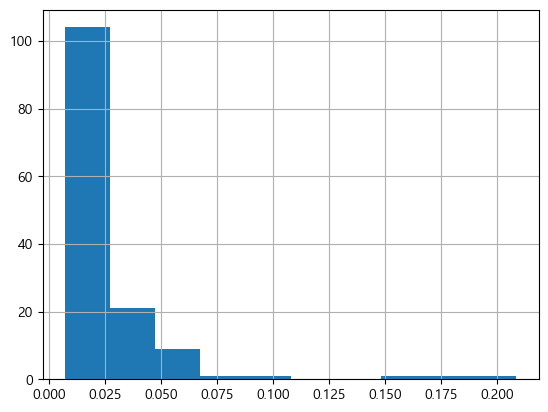

In [225]:
freq_sort['Support'].hist()

### 
연관규칙 생성

In [228]:
# 최소 지지도 0.01로 설정 및 연관규칙 발견
freq_items = apriori(df10, min_support=0.01, use_colnames = True)
freq_items

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.021429,(가래떡)
1,0.014286,(가시오이)
2,0.014286,(가지)
3,0.021429,(간편요리)
4,0.014286,(간편조리면)
...,...,...
161,0.014286,"(잼, 식빵, 식사대용, 스낵)"
162,0.014286,"(치약/칫솔, 식빵, 식사대용, 스낵)"
163,0.014286,"(식빵, 식사대용, 푸딩, 스낵)"
164,0.014286,"(두유, 냉동생선, 어묵, 스낵)"


In [275]:
rules = association_rules(freq_items, metric = 'confidence', min_threshold =0.01) # 최소 신뢰도는 구글링 후 수정 필요
rules['lift'].max()

70.0

In [271]:
# 최소 신뢰도를 기준으로 연관규칙 만들기
rules = association_rules(freq_items, metric = 'lift', min_threshold = 1.1) # 최소 신뢰도는 구글링 후 수정 필요
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(가래떡),(두부),0.021429,0.207143,0.014286,0.666667,3.218391,0.009847,2.378571,0.704380
1,(두부),(가래떡),0.207143,0.021429,0.014286,0.068966,3.218391,0.009847,1.051058,0.869369
2,(두유),(가래떡),0.050000,0.021429,0.014286,0.285714,13.333333,0.013214,1.370000,0.973684
3,(가래떡),(두유),0.021429,0.050000,0.014286,0.666667,13.333333,0.013214,2.850000,0.945255
4,(가래떡),(스낵),0.021429,0.171429,0.014286,0.666667,3.888889,0.010612,2.485714,0.759124
...,...,...,...,...,...,...,...,...,...,...
249,"(식빵, 식사대용, 스낵)","(잼, 두유)",0.028571,0.021429,0.014286,0.500000,23.333333,0.013673,1.957143,0.985294
250,(잼),"(두유, 식빵, 식사대용, 스낵)",0.042857,0.014286,0.014286,0.333333,23.333333,0.013673,1.478571,1.000000
251,(두유),"(잼, 식빵, 식사대용, 스낵)",0.050000,0.014286,0.014286,0.285714,20.000000,0.013571,1.380000,1.000000
252,"(식빵, 식사대용)","(잼, 두유, 스낵)",0.064286,0.014286,0.014286,0.222222,15.555556,0.013367,1.267347,1.000000


리프트가 1보다 큰 양의 관계를 만족하는 연관규칙 추출, 신뢰도의 내림차순으로 정렬

In [319]:
rules = rules[rules['lift'] > 1]
rules=rules[['antecedents','consequents','support','confidence','lift']]
rules.sort_values(by='lift', ascending = False).head(20)

,antecedents,consequents,support,confidence,lift
242,"(냉동생선, 스낵)","(두유, 어묵)",0.014286,1.000000,70.000000
254,"(잼, 스낵)","(두유, 식빵, 식사대용)",0.014286,1.000000,70.000000
255,"(두유, 식빵, 식사대용)","(잼, 스낵)",0.014286,1.000000,70.000000
239,"(두유, 어묵)","(냉동생선, 스낵)",0.014286,1.000000,70.000000
138,"(복숭아, 콩)",(가시오이),0.014286,1.000000,70.000000
143,(가시오이),"(복숭아, 콩)",0.014286,1.000000,70.000000
240,"(두유, 스낵)","(냉동생선, 어묵)",0.014286,0.666667,46.666667
141,(복숭아),"(콩, 가시오이)",0.014286,0.666667,46.666667
241,"(냉동생선, 어묵)","(두유, 스낵)",0.014286,1.000000,46.666667
140,"(콩, 가시오이)",(복숭아),0.014286,1.000000,46.666667


#### 결과 분석

조건부와 결론부에 관심 있는 항목의 연관규칙.

#### 10대 탑 10: 두부, 논GMO유정란, 아이스크림, 요구르트, 어묵, 과즘, 맵쌀, 식빵(식사대용), 냉동생선, 두유

In [419]:
# 친환경을 구매할 때, 함께 구매되는 상품들에 대한 연관규칙
dfre = rules[rules.antecedents.apply(lambda x: '스낵' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
254,"(잼, 스낵)","(두유, 식빵, 식사대용)",0.014286,1.000000,70.000000
242,"(냉동생선, 스낵)","(두유, 어묵)",0.014286,1.000000,70.000000
240,"(두유, 스낵)","(냉동생선, 어묵)",0.014286,0.666667,46.666667
243,"(어묵, 스낵)","(두유, 냉동생선)",0.014286,0.500000,35.000000
133,"(두유, 스낵)",(가래떡),0.014286,0.666667,31.111111
256,"(두유, 스낵)","(잼, 식빵, 식사대용)",0.014286,0.666667,31.111111
257,"(식빵, 식사대용, 스낵)","(잼, 두유)",0.014286,0.500000,23.333333
251,"(두유, 식빵, 식사대용, 스낵)",(잼),0.014286,1.000000,23.333333
229,"(식빵, 식사대용, 스낵)",(푸딩),0.014286,0.500000,23.333333
236,"(두유, 어묵, 스낵)",(냉동생선),0.014286,1.000000,20.000000


In [381]:
dfre=rules[rules.antecedents.apply(lambda x: '두유' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
239,"(두유, 어묵)","(냉동생선, 스낵)",0.014286,1.000000,70.000000
255,"(두유, 식빵, 식사대용)","(잼, 스낵)",0.014286,1.000000,70.000000
240,"(두유, 스낵)","(냉동생선, 어묵)",0.014286,0.666667,46.666667
238,"(두유, 냉동생선)","(어묵, 스낵)",0.014286,1.000000,35.000000
256,"(두유, 스낵)","(잼, 식빵, 식사대용)",0.014286,0.666667,31.111111
133,"(두유, 스낵)",(가래떡),0.014286,0.666667,31.111111
252,"(잼, 두유)","(식빵, 식사대용, 스낵)",0.014286,0.666667,23.333333
251,"(두유, 식빵, 식사대용, 스낵)",(잼),0.014286,1.000000,23.333333
211,"(두유, 식빵, 식사대용)",(잼),0.014286,1.000000,23.333333
159,(두유),"(냉동생선, 스낵)",0.014286,0.285714,20.000000


전체 거래의 2.1%가 {스낵, 논지엠오유정란}을 구매하였으며, 그중에서 60%가 두부를 구매하였다.

In [363]:
# 어떤 상품이 친환경 상품의 판매에 영향을 미치는지 알 수 있는 연관규칙
dfru=rules[rules.consequents.apply(lambda x: '무침' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
94,(죽),(무침),0.014286,0.5,35.0


전체 거래의 1.4%가 깐마늘을 구매하였으며, 그중에서 67%가 논지엠오유정란을 구매하였다.

In [75]:
cond1 = (df['유기신선'] == '신선')
cond2 = (df['유기신선'] == '유기농')
cond3 = (df['유기신선'] == '신선/유기농')

dffood = df.loc[cond1]
dff2 = dffood[['유기신선', '물품중분류']]
dff2['물품중분류'].value_counts()

물품중분류
두부          42366
논지엠오유정란     29188
우유/산양유      14477
유정란          9737
냉동생선         6980
돼지(중량)       6747
미역/다시마       5807
한우           4972
김            4946
무항생제닭        4785
요구르트         4349
기타냉동수산       4289
한우(중량)       4176
아이스크림        3898
보리살림(냉장)     3868
보리살림돼지       3766
콩가공/기타       3743
패류/갑각류       2593
논지엠오닭        2411
한우(냉장)       2088
무항생제돼지       1795
유기한우         1528
어류/연체류       1318
유기한우(냉장)     1306
무항생제(냉장)     1177
유부           1143
냉동패류         1121
토종닭           884
기타해조류         731
생물해조류         725
치즈/기타         546
무항생제오리        497
재래닭유정란        348
Name: count, dtype: int64

In [76]:
# 10대는 보통 요구르트, 아이스크림을 

In [79]:
dffood = df.loc[cond2]
dff2 = dffood[['유기신선', '물품중분류']]
dff2[(dff2['물품중분류'] != '스낵') & (dff2['물품중분류'] != '피자/핫도그')]
dff2.value_counts()

유기신선  물품중분류        
유기농   과즙               10572
      식빵, 식사대용          7880
      기름                6364
      식사대용/기타           6209
      기타양념              5330
                       ...  
      다래순말림(100g)         24
      말린곤드레나물(100g)       20
      말린삼잎국화나물            10
      토란줄기말림(70g)          5
      가루/기타                1
Name: count, Length: 99, dtype: int64

In [81]:
dff2['물품중분류'].value_counts().head(10)

물품중분류
과즙          10572
식빵, 식사대용     7880
기름           6364
식사대용/기타      6209
기타양념         5330
라면           5115
단과자빵         5017
만두           4883
간편조리면        4149
앙금크림빵        3987
Name: count, dtype: int64

In [83]:
dffood = df.loc[cond3]
dff2 = dffood[['유기신선', '물품중분류']]
dff2['물품중분류'].value_counts()

물품중분류
콩나물        14276
김가공        10768
양파          9825
오이          8205
당근          7809
           ...  
개복숭아           2
오가피순           1
청갓             1
떡케이크/선물        1
즙용브로컬리         1
Name: count, Length: 197, dtype: int64

### 연령대 20대

In [161]:
df20 = df.loc[df['연령대']=='20대']
df20 = df20.groupby(['거래번호','물품중분류'])['구매수량'].sum()
df20 = df20.unstack()
df20

물품중분류,가공소금,가래떡,가시오이,가지,가지말림,간장,간편요리,간편조리면,갓끈동부,건강/기타,...,호박잎,혼합곡,홍고추,홍삼,홍화나물,화본,환경용품,황기,황태류,휴지
거래번호,,,,,,,,,,,,,,,,,,,,,
1000103744-2022-10-19-12:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000491648-2022-01-16-12:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000491648-2022-01-23-07:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000491648-2022-01-27-03:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000491648-2022-02-03-09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999574784-2022-07-10-08:03:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999574784-2022-08-13-01:16:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999574784-2022-08-27-07:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df20 = df20.applymap(encode_units)

In [335]:
freq2 = df20.sum(axis = 0).to_frame('Frequency')
freq_sort2 = freq2.sort_values('Frequency', ascending = False)
freq_items2 = apriori(df20, min_support=0.01, use_colnames = True)
rules2 = association_rules(freq_items2, metric = 'confidence', min_threshold =0.01)
rules2 = rules2[rules2['lift'] > 1]
rules2=rules2[['antecedents','consequents','support','confidence','lift']]
rules2.sort_values(by='lift', ascending = False).head(40)

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
21,(두부),(콩나물),0.017952,0.089894,1.524257
20,(콩나물),(두부),0.017952,0.304392,1.524257
10,(우유/산양유),(논지엠오유정란),0.011265,0.142314,1.308087
11,(논지엠오유정란),(우유/산양유),0.011265,0.103544,1.308087
6,(냉동생선),(두부),0.010060,0.259317,1.298539
7,(두부),(냉동생선),0.010060,0.050377,1.298539
8,(두부),(논지엠오유정란),0.026928,0.134842,1.239408
9,(논지엠오유정란),(두부),0.026928,0.247508,1.239408
19,(유정란),(두부),0.012470,0.241822,1.210936
18,(두부),(유정란),0.012470,0.062443,1.210936


#### 20대 탑 10: 두부, 과즙, 논GMO유정란, 우유/산양유, 김가공, 콩나물, 유정란, 양파, 식빵(식사대용), 푸딩

In [425]:
dfre=rules2[rules2.antecedents.apply(lambda x: '과즙' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
0,(과즙),(논지엠오유정란),0.012229,0.117886,1.083561


In [170]:
dfru=rules2[rules2.consequents.apply(lambda x: '과즙' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
1,(논지엠오유정란),(과즙),0.012229,0.112403,1.083561


In [93]:
dfre=rules2[rules2.antecedents.apply(lambda x: '과즙' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
0,(과즙),(논지엠오유정란),0.012229,0.117886,1.083561


In [99]:
dfru=rules2[rules2.consequents.apply(lambda x: '과즙' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
1,(논지엠오유정란),(과즙),0.012229,0.112403,1.083561


In [101]:
dfre=rules2[rules2.antecedents.apply(lambda x: '우유/산양유' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
10,(우유/산양유),(논지엠오유정란),0.011265,0.142314,1.308087
16,(우유/산양유),(두부),0.017229,0.217656,1.089922


In [103]:
dfru=rules2[rules2.consequents.apply(lambda x: '우유/산양유' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
11,(논지엠오유정란),(우유/산양유),0.011265,0.103544,1.308087
17,(두부),(우유/산양유),0.017229,0.086275,1.089922


### 연령대: 30대

In [36]:
df30 = df.loc[df['연령대']=='30대']
df30 = df30.groupby(['거래번호','물품중분류'])['구매수량'].sum()
df30 = df30.unstack()
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df30 = df30.applymap(encode_units)
freq3 = df30.sum(axis = 0).to_frame('Frequency')
freq_sort3 = freq3.sort_values('Frequency', ascending = False)
freq_items3 = apriori(df30, min_support=0.01, use_colnames = True)
rules3 = association_rules(freq_items3, metric = 'confidence', min_threshold = 0.01)
rules3 = rules3[rules3['lift'] > 1]
rules3.sort_values(by='lift', ascending = False).head(10)

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(과즙),(스낵),0.066263,0.113380,0.014386,0.217099,1.914791,0.006873,1.132481,0.511654
3,(스낵),(과즙),0.113380,0.066263,0.014386,0.126880,1.914791,0.006873,1.069426,0.538844
29,(두부),(콩나물),0.195023,0.067005,0.020570,0.105475,1.574145,0.007503,1.043007,0.453099
28,(콩나물),(두부),0.067005,0.195023,0.020570,0.306994,1.574145,0.007503,1.161574,0.390929
8,(김가공),(스낵),0.063772,0.113380,0.010856,0.170233,1.501431,0.003626,1.068516,0.356717
9,(스낵),(김가공),0.113380,0.063772,0.010856,0.095749,1.501431,0.003626,1.035363,0.376676
14,(논지엠오유정란),(우유/산양유),0.141840,0.077549,0.014831,0.104559,1.348286,0.003831,1.030163,0.301013
15,(우유/산양유),(논지엠오유정란),0.077549,0.141840,0.014831,0.191241,1.348286,0.003831,1.061082,0.280034
19,(두부),(당근),0.195023,0.041674,0.010367,0.053156,1.275514,0.002239,1.012126,0.268334
18,(당근),(두부),0.041674,0.195023,0.010367,0.248754,1.275514,0.002239,1.071523,0.225396


In [107]:
# 두부, 논GMO유정란, 우유/산양유, 과즙, 김가공,  콩나물, 유정란, 양파, 식빵(식사대용), 맵쌀

In [38]:
dfre=rules3[rules3.antecedents.apply(lambda x: '상추' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift


In [109]:
dfru=rules3[rules3.consequents.apply(lambda x: '두부' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
20,(콩나물),(두부),0.020792,0.306994,1.557336
12,(당근),(두부),0.010479,0.248754,1.261894
14,(양파),(두부),0.012682,0.248021,1.258174
7,(논지엠오유정란),(두부),0.033129,0.231075,1.172209
19,(유정란),(두부),0.012232,0.216906,1.100331
4,(김가공),(두부),0.013971,0.216744,1.099511


### 연령대: 40대

In [313]:
df40 = df.loc[df['연령대']=='40대']
df40 = df40.groupby(['거래번호','물품중분류'])['구매수량'].sum()
df40 = df40.unstack()
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df40 = df40.applymap(encode_units)
freq4 = df40.sum(axis = 0).to_frame('Frequency')
freq_sort4 = freq4.sort_values('Frequency', ascending = False)
freq_items4 = apriori(df40, min_support=0.01, use_colnames = True)
rules4 = association_rules(freq_items4, metric = 'confidence', min_threshold = 0.01)
rules4 = rules4[rules4['lift'] > 1]

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [315]:
rules4.sort_values(by='lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(두부),(콩나물),0.203600,0.077759,0.024710,0.121367,1.560807,0.008879,1.049631,0.451162
20,(콩나물),(두부),0.077759,0.203600,0.024710,0.317780,1.560807,0.008879,1.167366,0.389601
7,(논지엠오유정란),(양파),0.159305,0.049068,0.010004,0.062797,1.279790,0.002187,1.014649,0.260049
6,(양파),(논지엠오유정란),0.049068,0.159305,0.010004,0.203877,1.279790,0.002187,1.055986,0.229903
15,(두부),(양파),0.203600,0.049068,0.011659,0.057266,1.167076,0.001669,1.008696,0.179756
14,(양파),(두부),0.049068,0.203600,0.011659,0.237617,1.167076,0.001669,1.044619,0.150545
19,(유정란),(두부),0.049826,0.203600,0.011800,0.236833,1.163226,0.001656,1.043546,0.147680
18,(두부),(유정란),0.203600,0.049826,0.011800,0.057958,1.163226,0.001656,1.008633,0.176195
9,(논지엠오유정란),(우유/산양유),0.159305,0.070555,0.013068,0.082034,1.162691,0.001829,1.012505,0.166441
8,(우유/산양유),(논지엠오유정란),0.070555,0.159305,0.013068,0.185222,1.162691,0.001829,1.031809,0.150549


In [112]:
# 두부, 논GMO유정란, 콩나물, 우유/산양유, 김가공, 유정란, 양파, 돼지(중량), 맵쌀, 오이

In [437]:
dfre=rules4[rules4.antecedents.apply(lambda x: '콩나물' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
20,(콩나물),(두부),0.02471,0.317780,1.560807
10,(콩나물),(논지엠오유정란),0.01372,0.176444,1.107588


In [114]:
dfru=rules4[rules4.consequents.apply(lambda x: '양파' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
5,(논지엠오유정란),(양파),0.010079,0.062797,1.270278
11,(두부),(양파),0.011747,0.057266,1.158402


### 연령대: 50대

In [353]:
df50 = df.loc[df['연령대']=='50대']
df50 = df50.groupby(['거래번호','물품중분류'])['구매수량'].sum()
df50 = df50.unstack()
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df50 = df50.applymap(encode_units)
freq5 = df50.sum(axis = 0).to_frame('Frequency')
freq_sort5 = freq5.sort_values('Frequency', ascending = False)
freq_items5 = apriori(df50, min_support=0.01, use_colnames = True)
rules5 = association_rules(freq_items5, metric = 'confidence', min_threshold = 0.01)
rules5 = rules5[rules5['lift'] > 1]
rules5.sort_values(by='lift', ascending = False).head(30)

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(콩나물),(두부),0.087694,0.219338,0.028319,0.322933,1.472308,0.009085,1.153006,0.351630
27,(두부),(콩나물),0.219338,0.087694,0.028319,0.129113,1.472308,0.009085,1.047559,0.410926
4,(양파),(논지엠오유정란),0.054484,0.159997,0.011595,0.212806,1.330060,0.002877,1.067085,0.262454
5,(논지엠오유정란),(양파),0.159997,0.054484,0.011595,0.072467,1.330060,0.002877,1.019388,0.295421
6,(우유/산양유),(논지엠오유정란),0.064163,0.159997,0.012757,0.198827,1.242692,0.002491,1.048466,0.208685
7,(논지엠오유정란),(우유/산양유),0.159997,0.064163,0.012757,0.079735,1.242692,0.002491,1.016921,0.232494
25,(두부),(중파),0.219338,0.038614,0.010295,0.046936,1.215511,0.001825,1.008732,0.227116
24,(중파),(두부),0.038614,0.219338,0.010295,0.266608,1.215511,0.001825,1.064454,0.184422
8,(콩나물),(논지엠오유정란),0.087694,0.159997,0.016896,0.192668,1.204194,0.002865,1.040467,0.185868
9,(논지엠오유정란),(콩나물),0.159997,0.087694,0.016896,0.105601,1.204194,0.002865,1.020021,0.201867


In [117]:
# 두부, 논GMO유정란, 콩나물, 우유/산양유, 양파, 맵쌀, 오이, 김가공, 유정란, 당근

In [443]:
dfre=rules5[rules5.antecedents.apply(lambda x: '우유/산양유' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
6,(우유/산양유),(논지엠오유정란),0.012757,0.198827,1.242692


In [119]:
dfru=rules5[rules5.consequents.apply(lambda x: '우유/산양유' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False)

,antecedents,consequents,support,confidence,lift
5,(논지엠오유정란),(우유/산양유),0.012882,0.079735,1.230706


### 연령대: 60대

In [367]:
df60 = df.loc[df['연령대']=='60대']
df60 = df60.groupby(['거래번호','물품중분류'])['구매수량'].sum()
df60 = df60.unstack()
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df60 = df60.applymap(encode_units)
freq6 = df60.sum(axis = 0).to_frame('Frequency')
freq_sort6 = freq6.sort_values('Frequency', ascending = False)
freq_items6 = apriori(df60, min_support=0.01, use_colnames = True)
rules6 = association_rules(freq_items6, metric = 'confidence', min_threshold = 0.01)
rules6 = rules6[rules6['lift'] > 1]
rules6.sort_values(by='lift', ascending = False).head(30)

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(콩나물),(두부),0.078040,0.241354,0.025429,0.325851,1.350095,0.006594,1.125339,0.281261
19,(두부),(콩나물),0.241354,0.078040,0.025429,0.105362,1.350095,0.006594,1.030539,0.341808
4,(우유/산양유),(논지엠오유정란),0.055154,0.165461,0.011698,0.212090,1.281813,0.002572,1.059181,0.232688
5,(논지엠오유정란),(우유/산양유),0.165461,0.055154,0.011698,0.070697,1.281813,0.002572,1.016725,0.263445
9,(두부),(당근),0.241354,0.041930,0.011528,0.047764,1.139126,0.001408,1.006126,0.160990
8,(당근),(두부),0.041930,0.241354,0.011528,0.274933,1.139126,0.001408,1.046311,0.127479
6,(콩나물),(논지엠오유정란),0.078040,0.165461,0.013845,0.177408,1.072202,0.000932,1.014523,0.073040
7,(논지엠오유정란),(콩나물),0.165461,0.078040,0.013845,0.083675,1.072202,0.000932,1.006149,0.080691
0,(두부),(논지엠오유정란),0.241354,0.165461,0.041874,0.173496,1.048559,0.001939,1.009721,0.061043
1,(논지엠오유정란),(두부),0.165461,0.241354,0.041874,0.253074,1.048559,0.001939,1.015691,0.055491


In [122]:
# 두부, 논GMO유정란, 콩나물, 오이, 우유/산양유, 양파, 맵쌀, 당근, 유정란, 사과

In [413]:
dfre=rules6[rules6.antecedents.apply(lambda x: '양파' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False).head(5)

,antecedents,consequents,support,confidence,lift
12,(양파),(두부),0.012489,0.25,1.035823


In [124]:
dfru=rules6[rules6.consequents.apply(lambda x: '두부' in x)]
dfru=dfru[['antecedents','consequents','support','confidence','lift']]
dfru.sort_values(by='lift', ascending = False).head(5)

,antecedents,consequents,support,confidence,lift
135,(아이스크림),"(콩나물, 두부)",0.014815,0.142857,6.428571
133,(콩나물),"(두부, 아이스크림)",0.014815,0.333333,6.428571
129,(아이스크림),"(애호박, 두부)",0.014815,0.142857,6.428571
127,(애호박),"(두부, 아이스크림)",0.014815,0.285714,5.510204
62,(양념가루),(두부),0.014815,1.000000,4.655172


In [125]:
df['연령대'].value_counts()

연령대
30대    222111
40대    191461
50대    100073
60대     54554
20대     53961
70대     12652
80대      1503
10대       447
Name: count, dtype: int64

### 연령대: 70대 이상

In [317]:
df70 = df.loc[(df['연령대']=='70대') | (df['연령대']=='80대')]
df70 = df70.groupby(['거래번호','물품중분류'])['구매수량'].sum()
df70 = df70.unstack()
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df70 = df70.applymap(encode_units)
freq7 = df70.sum(axis = 0).to_frame('Frequency')
freq_sort7 = freq7.sort_values('Frequency', ascending = False)
freq_items7 = apriori(df70, min_support=0.01, use_colnames = True)
rules7 = association_rules(freq_items7, metric = 'confidence', min_threshold = 0.01)
rules7 = rules7[rules7['lift'] > 1]
rules7.sort_values(by='lift', ascending = False).head(20)

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(두부),(콩나물),0.198660,0.059661,0.020724,0.104320,1.748555,0.008872,1.049861,0.534229
12,(콩나물),(두부),0.059661,0.198660,0.020724,0.347368,1.748555,0.008872,1.227859,0.455261
2,(우유/산양유),(논지엠오유정란),0.073686,0.149466,0.016956,0.230114,1.539570,0.005943,1.104752,0.378347
3,(논지엠오유정란),(우유/산양유),0.149466,0.073686,0.016956,0.113445,1.539570,0.005943,1.044847,0.412056
6,(양파),(두부),0.042705,0.198660,0.012142,0.284314,1.431156,0.003658,1.119680,0.314703
7,(두부),(양파),0.198660,0.042705,0.012142,0.061117,1.431156,0.003658,1.019611,0.375950
1,(논지엠오유정란),(두부),0.149466,0.198660,0.032447,0.217087,1.092754,0.002754,1.023536,0.099798
0,(두부),(논지엠오유정란),0.198660,0.149466,0.032447,0.163330,1.092754,0.002754,1.016570,0.105924
4,(두부),(멥쌀),0.198660,0.054218,0.011095,0.055848,1.030066,0.000324,1.001727,0.036425
5,(멥쌀),(두부),0.054218,0.198660,0.011095,0.204633,1.030066,0.000324,1.007510,0.030862


In [128]:
# 두부, 논GMO유정란, 우유/산양유, 콩나물, 맵쌀, 오이, 양파, 유정란, 당근, 사과

In [355]:
dfre=rules7[rules7.antecedents.apply(lambda x: '멥쌀' in x)]
dfre=dfre[['antecedents','consequents','support','confidence','lift']]
dfre.sort_values(by='lift', ascending = False).head(5)

,antecedents,consequents,support,confidence,lift
5,(멥쌀),(두부),0.011095,0.204633,1.030066


In [130]:
dfru=rules7[rules7.consequents.apply(lambda x: '논지엠오유정란' in x)]
dfru[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,(두부),(논지엠오유정란),0.032659,0.163330,1.085663
2,(우유/산양유),(논지엠오유정란),0.017067,0.230114,1.529579


In [488]:
df1 = pd.DataFrame(df.groupby('회원번호')['구매수량'].count())
df1['구매수량'] = pd.to_numeric(df1['구매수량'], errors='coerce')
conditions = [
    (df1 < df1.quantile(0.25)),  # 예: 30 미만은 '적음'
    (df1 >= df1.quantile(0.25)) & (df1 < df1.median()),  # 30 이상 69 미만은 '보통'
    (df1 >= df1.median())  # 69 이상은 '많음'
]
# 범주 정의
categories = ['적음', '보통', '많음']
# 새 열 생성
df1['이용횟수_범주'] = np.select(conditions, categories)
summary_stats = df1.groupby('이용횟수_범주')['구매수량'].describe()
q2_threshold = df1['구매수량'].quantile(0.5)
# '보통' 범주와 '많음' 범주에서 Q2 이하값 레코드를 필터링하여 '체리슈머' 파생변수에 True/False 할당
df1['체리슈머'] = ( (df1['이용횟수_범주'] == '보통') & (df1['구매수량'] <= q2_threshold) | (df1['이용횟수_범주'] == '많음') & (df1['구매수량'] <= q2_threshold) )
df1

,구매수량,이용횟수_범주,체리슈머
회원번호,,,
18764160,36,많음,False
18792000,1,적음,False
18942336,81,많음,False
18949760,2,적음,False
19391488,1,적음,False
...,...,...,...
1644957952,6,보통,True
1645334720,1,적음,False
1670400000,3077,많음,False


In [490]:
df = pd.merge(df1, df, on='회원번호', how='inner')
df

,회원번호,구매수량_x,이용횟수_범주_x,체리슈머,회원상태,구매수량_y,구매금액,주문일시,배송시작일,배송완료일,...,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주_y,거래번호
0,18764160,36,많음,False,정상회원,2.0,4020,2022-08-29,2022-08-29,2022-08-30,...,식품,유기농,월요일,60대,36,딸기꽁꽁_120ml,1988,저,적음,18764160-2022-08-29-11:25:00
1,18764160,36,많음,False,정상회원,2.0,3829,2022-08-29,2022-08-29,2022-08-30,...,식품,유기농,월요일,60대,36,포도꽁꽁_120ml,1903,저,적음,18764160-2022-08-29-11:25:00
2,18764160,36,많음,False,정상회원,1.0,3063,2022-08-29,2022-08-29,2022-08-29,...,식품,유기농,월요일,60대,36,크림빵_70g/,3007,저,적음,18764160-2022-08-29-11:25:00
3,18764160,36,많음,False,정상회원,1.0,2010,2022-08-29,2022-08-30,2022-08-30,...,식품,유기농,월요일,60대,36,오미자꽁꽁_120ml,1999,저,적음,18764160-2022-08-29-11:25:00
4,18764160,36,많음,False,정상회원,2.0,17613,2022-08-11,2022-08-11,2022-08-13,...,비식품,비식품,목요일,60대,36,물사랑치약_150g*2개,8791,중,적음,18764160-2022-08-11-11:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663789,1670620864,47,많음,False,정상회원,1.0,3733,2022-04-12,2022-04-12,2022-04-12,...,식품,유기농,화요일,80대,46,상큼한감귤&한라봉_125ml*24개,5524,중,적음,1670620864-2022-04-12-03:39:00
663790,1670620864,47,많음,False,정상회원,2.0,5360,2022-04-19,2022-04-19,2022-04-19,...,식품,유기농,화요일,80대,46,우리밀해물라면_114g:1봉지,2680,저,적음,1670620864-2022-04-19-03:30:00
663791,1670620864,47,많음,False,정상회원,1.0,12444,2022-05-06,2022-05-06,2022-05-07,...,식품,유기농,금요일,80대,46,양념고추장_300g,12443,고,적음,1670620864-2022-05-06-03:19:00
663792,1670620864,47,많음,False,정상회원,1.0,2680,2022-05-06,2022-05-06,2022-05-06,...,식품,신선/유기농,금요일,80대,46,월동무_0.9~1.2kg,3177,저,적음,1670620864-2022-05-06-03:19:00


In [492]:
df[['물품중분류']]

,물품중분류
0,빙과
1,빙과
2,앙금크림빵
3,빙과
4,치약/칫솔
...,...
663789,과즙
663790,라면
663791,기타양념
663792,월동무


In [496]:
df = df.groupby(['거래번호','물품중분류'])['구매수량_y'].sum()
df = df.unstack()
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0
df = df.applymap(encode_units)
freq1= df.sum(axis = 0).to_frame('Frequency')
freq_sort1 = freq1.sort_values('Frequency', ascending = False)
freq_items1 = apriori(df, min_support=0.01, use_colnames = True)
rules1 = association_rules(freq_items1, metric = 'confidence', min_threshold = 0.01)
rules1 = rules1[rules1['lift'] > 1]
rules1.sort_values(by='lift', ascending = False).head(30)

C:\Users\campus4D022\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(콩나물),(두부),0.073320,0.205673,0.023155,0.315804,1.535471,0.008075,1.160965,0.376326
19,(두부),(콩나물),0.205673,0.073320,0.023155,0.112581,1.535471,0.008075,1.044242,0.439031
6,(우유/산양유),(논지엠오유정란),0.071289,0.149029,0.013428,0.188354,1.263873,0.002803,1.048451,0.224808
7,(논지엠오유정란),(우유/산양유),0.149029,0.071289,0.013428,0.090100,1.263873,0.002803,1.020674,0.245345
12,(양파),(두부),0.050450,0.205673,0.012427,0.246328,1.197669,0.002051,1.053943,0.173814
13,(두부),(양파),0.205673,0.050450,0.012427,0.060423,1.197669,0.002051,1.010614,0.207779
2,(두부),(논지엠오유정란),0.205673,0.149029,0.035520,0.172701,1.158842,0.004869,1.028614,0.172560
3,(논지엠오유정란),(두부),0.149029,0.205673,0.035520,0.238342,1.158842,0.004869,1.042892,0.161074
8,(콩나물),(논지엠오유정란),0.073320,0.149029,0.012396,0.169070,1.134473,0.001469,1.024118,0.127912
9,(논지엠오유정란),(콩나물),0.149029,0.073320,0.012396,0.083180,1.134473,0.001469,1.010754,0.139292
